In [1]:
# 1.1 Task

In [ ]:
# Loading dataset: importing pandas

import pandas as pd

In [3]:
# Loading dataset

df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
# Standardize column names

df.columns = df.columns.str.strip().str.replace(' ', '_')

In [11]:
# Converting date columns

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

In [12]:
# Converting month columns

df['Month'] = df['Order_Date'].dt.to_period('M')

In [7]:
# Determining missing values

df.isnull().sum()  

Row_ID              0
Order_ID            0
Order_Date       5841
Ship_Date        5985
Ship_Mode           0
Customer_ID         0
Customer_Name       0
Segment             0
Country             0
City                0
State               0
Postal_Code        11
Region              0
Product_ID          0
Category            0
Sub-Category        0
Product_Name        0
Sales               0
Month            5841
dtype: int64

In [14]:
# Dropping rows with empty order dates

df = df.dropna(subset=['Order_Date'])

In [15]:
# Re-converting to datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce') 

In [16]:
# Recreating Month column

df['Month'] = df['Order_Date'].dt.to_period('M')

In [17]:
# Saving "cleaned" data

df.to_csv('cleaned_sales_data.csv', index=False)

In [18]:
# Preview of "cleaned" data

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-08
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-08
2,3,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-12
3,4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-11
4,5,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-11


In [19]:
# total sales

total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

Total Sales: $872,363.12


In [20]:
# Average Daily Sales

daily_sales = df.groupby('Order_Date')['Sales'].sum()
avg_daily_sales = daily_sales.mean()
print(f"Average Daily Sales: ${avg_daily_sales:,.2f}")

Average Daily Sales: $1,821.22


In [25]:
# Monthly Sales

monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

In [26]:
# Seaborn installation

!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\Emmanuel Cerrer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
#Seaborn installation

import seaborn as sns

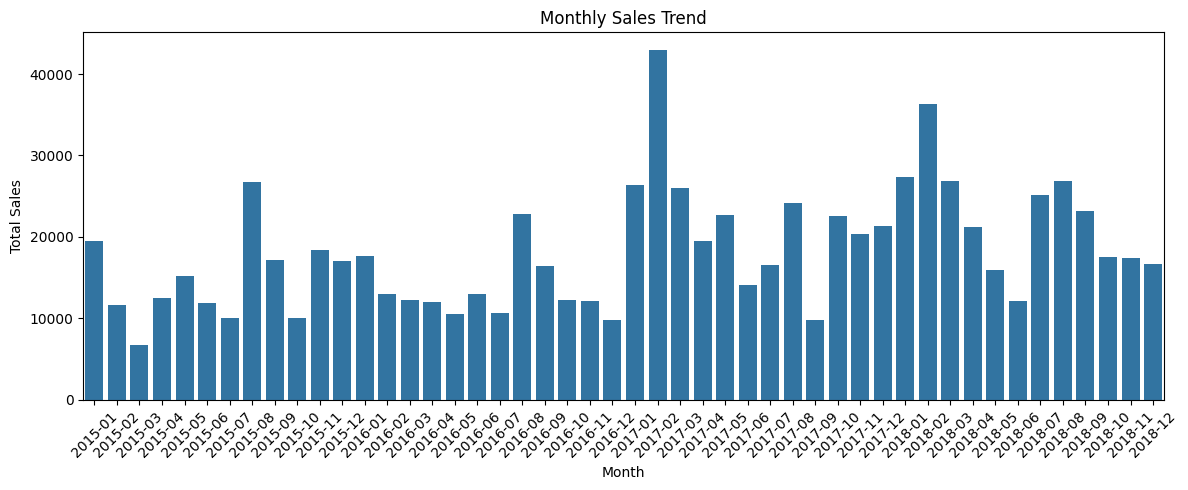

In [29]:
#Monthly Sales Bar Chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [ ]:
# Key Insight 1: Sales performance shows significant fluctuations across months, suggesting that product demand varies by period, possibly due to seasonality or market cycles. 
# Key Insight 2: The highest sales were recorded in January 2017, indicating a strong seasonal demand or the success of a major promotional campaign during this time.
# Key Insight 3: Monthly sales attained its lowest drop on February 2015, possibly due to offseason. 


In [ ]:
Question 1.2: Data Ingestion and Validation

### 1. How would you set up the pipeline if the data is ingested periodically?

If data is received on a recurring basis (e.g., daily or weekly), I would set up a simple automated pipeline using the following structure:

- **Step 1: File Monitoring / Scheduling**
  - Automate ingestion using `cron`, Windows Task Scheduler, or Apache Airflow.

- **Step 2: Ingestion**
  - Load new batches using `pandas.read_csv()` or a database connector.

- **Step 3: Logging & Versioning**
  - Save each raw file with a timestamp-based naming convention (e.g., `raw/2025-08-05.csv`).
  - Log key metadata such as row count, file size, and time of ingestion.

- **Step 4: Validation**
  - Apply checks on missing values, duplicates, and schema consistency.
  - Trigger alerts if issues are found.

- **Step 5: Cleaning and Output**
  - Clean the dataset and save to a processed location for reporting and analysis.

---

### 2. How will you verify the correctness of the ingested data?

The function below demonstrates a basic data ingestion and validation pipeline. This helps ensure data quality and integrity before analysis.

def ingest_and_validate(file_path):
    import pandas as pd

    # Step 1: Ingest
    df = pd.read_csv(file_path)

    # Step 2: Validation checks
    print("✅ Shape:", df.shape)
    print("🟨 Missing values:\n", df.isnull().sum())
    print("🟨 Duplicates:", df.duplicated().sum())
    print("🟨 Data types:\n", df.dtypes)

    # Step 3: Column schema check
    expected_cols = ['Order_ID', 'Order_Date', 'Sales']
    missing_cols = [col for col in expected_cols if col not in df.columns]
    if missing_cols:
        print("❌ Missing required columns:", missing_cols)
    else:
        print("✅ All expected columns present.")

    # Step 4: Sanity checks
    if 'Sales' in df.columns and (df['Sales'] < 0).any():
        print("❌ Negative values found in Sales.")
    if 'Order_Date' in df.columns:
        try:
            df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
            if df['Order_Date'].isnull().sum() > 0:
                print("❌ Some Order_Date values could not be parsed.")
        except Exception as e:
            print("❌ Error parsing dates:", e)

    return df